# Machine Learning

## Qué es Machine Learning?

El término Machine Learning según la definición común es "el estudio de los algoritmos de computador que mejoran automáticamente a través de la experiencia".


## Aplicaciones recientes:
### Computación visual. 
- ImageNet
- Vehículos conducidos autonomamente.
- Redes Neuronales Convolucionales
- Robots retroalimentados con CV.

### Reconocimiento de voz
- Asistentes por voz.
- Traductores automáticos en tiempo real.

### Traducción de idioma. 
- Traducción de idioma no supervisada.

### Videojuegos.
- Aprendizaje por refuerzo para solucionar juegos. 
- Aprendizaje para mejorar experiencia del jugador. 

### Ranking:
- Sistemas de recomendación.
...

## Tipos de Aprendizaje

Hay tres grandes categorías en las que se puede enmarcar el Machine Learning. Es importante poder identificar el tipo de algoritmo de Machine Learning que se va a utilizar dependiendo del caso de estudio ya que esto permite planear el ambiente más apropiado y entender qué hacer para que funcione. 

## Aprendizaje Supervisado. 

El aprendizaje supervisado es el más común y popular de los paradigmas de Machine Learning. El aprendizaje supervisado logra, a partir de datos conocidos y respuestas conocidas a estos datos, aproximar una respuesta, de manera que ante la presencia de datos nuevos estima una nueva respuesta. (ie. Aprender $y=f(x)$ a partir de ${x_i,y_i}^{n}_{i=1}$)

Aplicaciones:
- Clasificación de Spam.
- Reconocimiento facial. 

## Aprendizaje No Supervisado.

El aprendizaje no supervisado es opuesto al aprendizaje supervisado en varios sentidos. El objetivo del aprendizaje no supervisado es que, a partir de grandes cantidades de información no etiquetada, sea posible entender las propiedades de la información. A partir de aquí, es posible aprender a agrupar y organizar la información de manera que un humano (u otro algoritmo inteligente) pueda encontrar un sentido a partir de la información organizada. El aprendizaje no supervisado es interesante debido a que mucha información en el mundo real no está etiquetada. (ie. Aprender similaridades en ${x_i}^{n}_{i=1}$)

Aplicaciones:

- Sistemas generadores de recomendaciones. 

- Estimar hábitos de compra. 

Aprendizaje por Refuerzo. 

El aprendizaje por refuerzo es diferente a los aprendizajes supervisado y no supervisado. El objetivo del aprendizaje por refuerzo es determinar las políticas (o acciones) que debe tener un agente en orden de maximizar una función de recompensa. En Machine Learning, es muy común que el ambiente del agente sea modelado como un proceso de decisión de Markov. En general, se busca encontrar un equilibrio entre la exploración y la explotación. 

## Aplicaciones:

- Simulaciones industriales.
- Manejo de recursos en ambientes complejos. 
- Videojuegos.


## Aspectos importantes de Machine Learning.

- Validación y selección de Modelo. 
- Aprendizaje Estadístico. 
- Machine Learning Computacional.
- Optimización.





# Aprendizaje Supervisado: Regresión Lineal

A partir de un conjunto de variables de entrada, se busca predecir una característica objetivo de salida. Se denota una pareja $(x^{(i)},y^{(i)})$, la muestra de entrenamiento y el conjunto desde $i=1,...,n$ es denotado, conjunto de entrenamiento. El objetivo es a partir de nuestro conjunto deentrada $\mathcal{X}$ obtener una hipótesis $h:\mathcal{X} \rightarrow \mathcal{Y}$. Cuando $y$ únicamente puede tomar un pequeño número de valores discretos, se dice que este es un problema de clasificación. 


# Regresión Lineal

Para realizar aprendizaje supervisado, se necesita decidir cómo representar funciones hipótesis $h$. Inicialmente, es posible decidir representarlas como funciones lineales de x:

Denotaremos

\begin{equation}
h_{\theta}(x)=\theta_0 + \theta_1 x_1 +\theta_2 x_2
\end{equation}

Aquí, las $\theta_i$ son los parámetros, también llamados pesos (weights). También es posible escribir lo anterior de la siguiente manera. 

\begin{equation}
h_{\theta}(x)=\sum_{i=0}^{d}\theta_i x_i=\theta^T x
\end{equation}

Ahora, es importante en un conjunto de entrenamiento, escoger una función de costo que permita hacer que $h(x)$ sea tan cercana a $y$ como sea posible para obtener unos parámetros $\theta$ apropiados. Definimos una función de costo:

\begin{equation}
J(\theta)=\frac{1}{2}\sum_{i=1}^{n}(h_{\theta}(x^{(i)}-y^{(i)})^2
\end{equation}

Y podemos recordar esta ecuación como la solución al modelo de mínimos cuadrados. 



In [52]:
import numpy as np
import matplotlib.pyplot as plt

def linReg(X, y, theta=0, alpha=0.01, num_iters=100000):
    m = y.size  
    for i in range(num_iters):
        y_hat = np.dot(X, theta)
        theta = theta - alpha * (1.0/m) * np.dot(X.T, y_hat-y)
    return theta

In [53]:
x=np.linspace(-1,5,10)
y=7*x
t=linReg(x,y)

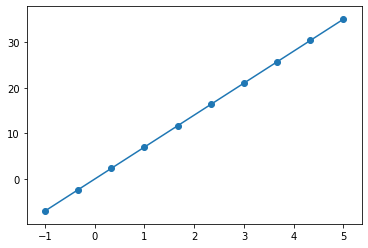

In [55]:
plt.plot(x,t*x)
plt.scatter(x,y)

# Mínimos cuadrados
Es claro que a partir de la función de costo $J(\theta)$ que se definió previamente, el parámetro óptimo que se puede obtener utilizando mínimos cuadrados es $\hat{\theta}=X^T X\theta - X^T \vec{y}$.

## Interpretación probabilística 

Cuando se tiene un problema de regresión es común pensar en por qué la escogencia de la función de costo $J$ es apropiada. Asumamos que el target y las entradas están relacionadas a través de 

\begin{equation}
y=\theta^T x+ \epsilon
\end{equation}

donde $\epsilon$ es un término de error que contiene toda la información que no se ha modelado. Se puede asumir que este término es IID y se modela gaussiano estándar. Por lo tanto, se puede decir que 

\begin{equation}
p(y|x;\theta)=\frac{1}{\sqrt{2\pi \sigma^2}} \exp{\frac{-(y-\theta^T x)^2}{2\sigma^2}}
\end{equation}

A partir de esta probabilidad se desea observar esta función explicitamente como una función de $\theta$, a esta función se la llamará función de likelihood. 

\begin{equation}
L(\theta)=L(\theta;X,y)=p(y|X;\theta)
\end{equation}

Donde 
\begin{equation}
L(\theta)=\prod{\frac{1}{\sqrt{2\pi \sigma^2}} \exp{\frac{-(y-\theta^T x)^2}{2\sigma^2}}}
\end{equation}

Ahora, dado este modelo probabilístico que relaciona $y$ con $x$, se desea cuál es la manera razonable de escoger el parámetro $\theta$. Como se ha visto previamente, en lugar de maximizar esta función, es posible maximizar la función log-llikelihood $l(\theta)$

Donde 
\begin{equation}
l(\theta)=\log{\prod{\frac{1}{\sqrt{2\pi \sigma^2}} \exp{\frac{-(y-\theta^T x)^2}{2\sigma^2}}}}
\end{equation}

De manera que el máximo es 

Donde 
\begin{equation}
\frac{1}{2}\sum_{i=1}^{n}{(y^{(i)}-\theta^T x^{(i)})^2}
\end{equation}

Por lo que la escogenca de nuestra función de costo es justificada. 



